In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LiH = pd.read_csv('LiH.csv')
NaH = pd.read_csv('NaH.csv')
KH  = pd.read_csv('KH.csv')
RbH = pd.read_csv('RbH.csv')


LiH['without_dis'] = LiH['energy']-LiH['E-dispersion']
NaH['without_dis'] = NaH['energy']-NaH['E-dispersion']
KH['without_dis'] = KH['energy']-KH['E-dispersion']
RbH['without_dis'] = RbH['energy']-RbH['E-dispersion']

LiH.head()

,cell_length,energy,E-dispersion,without_dis
0,3.517239,-23.458076,-1.32277,-22.135306
1,3.617239,-24.019365,-1.20817,-22.811195
2,3.717239,-24.413684,-1.10521,-23.308474
3,3.817239,-24.666217,-1.01151,-23.654707
4,3.917239,-24.806442,-0.92519,-23.881252


In [3]:
def plotG(df):
    plt.scatter(df['cell_length'], df['energy'], label='Total Energy')
    plt.scatter(df['cell_length'], df['without_dis'], label='Energy without dispersion')
    plt.xlabel('Cell Length')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

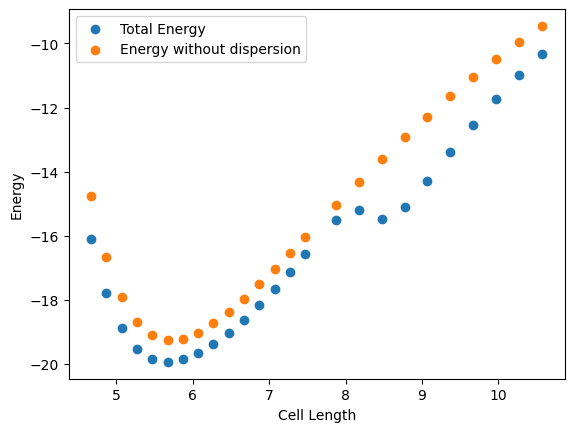

In [4]:
plotG(KH)
# plotG(NaH)
# plotG(KH)

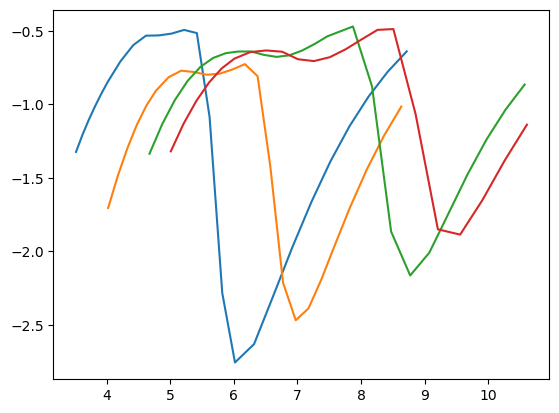

In [5]:
# plt.plot(LiH['cell_length'],LiH['without_dis'])
# plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(LiH['cell_length'],LiH['E-dispersion'])
plt.plot(NaH['cell_length'],NaH['E-dispersion'])
plt.plot(KH['cell_length'],KH['E-dispersion'])
plt.plot(RbH['cell_length'],RbH['E-dispersion'])
plt.show()
# plt.plot(CsH['cell_length'],CsH['E-dispersion'])

In [40]:
def findMinX(df):
    min_y_index = df["energy"].idxmin()
    min_x_value = df.loc[min_y_index, "cell_length"]
    
    # print(min_x_value,df['E-dispersion'][min_y_index])
    print(min_y_index)
    return -df['without_dis'][min_y_index]

In [59]:
val_LiH = abs(min(LiH['E-dispersion']))
val_NaH = abs(min(NaH['E-dispersion']))
val_KH = abs(min(KH['E-dispersion']))
val_RbH = abs(min(RbH['E-dispersion']))

base_LiH = abs(findMinX(LiH))
base_NaH = abs(findMinX(NaH))
base_KH = abs(findMinX(KH))
base_RbH = abs(findMinX(RbH))

total_LiH = abs(min(LiH['energy']))
total_NaH = abs(min(NaH['energy']))
total_KH = abs(min(KH['energy']))
total_RbH = abs(min(RbH['energy']))


print(val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH,val_RbH/base_RbH)

5
5
5
5
0.11487041137936889 0.12158257017119953 0.11229358602102645 0.10220756477375548


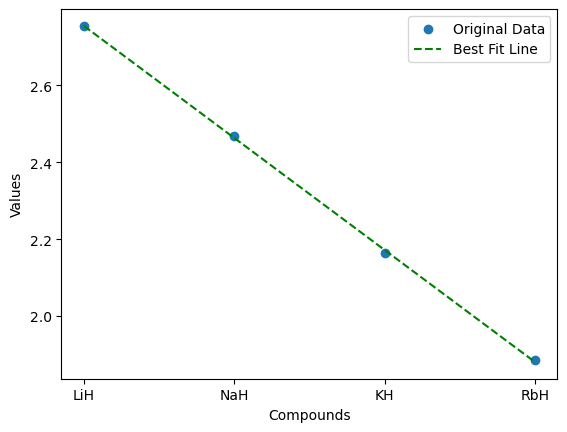

In [42]:
x = ['LiH', 'NaH', 'KH', 'RbH']
y = [val_LiH, val_NaH, val_KH, val_RbH]


x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values')
plt.legend()
plt.show()


Total Energy have the same trend

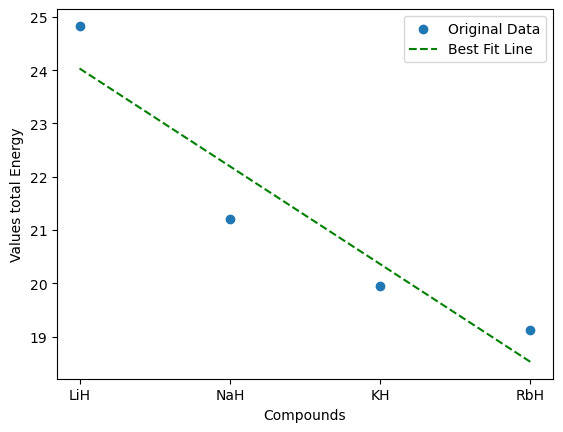

In [61]:
x = ['LiH', 'NaH', 'KH', 'RbH']
y = [total_LiH, total_NaH, total_KH, total_RbH]


x_indices = np.arange(len(x))

coefficients = np.polyfit(x_indices, y, 1)  
best_fit_line = np.polyval(coefficients, x_indices)

plt.scatter(x_indices, y, label='Original Data', marker='o')

plt.plot(x_indices, best_fit_line, label='Best Fit Line', linestyle='--', color='green')

plt.xticks(ticks=x_indices, labels=x)



plt.xlabel('Compounds')
plt.ylabel('Values total Energy')
plt.legend()
plt.show()


In [43]:
coefficients = np.polyfit(x_indices, y, 1)
y_pred = np.polyval(coefficients, x_indices)

y_mean = np.mean(y)

ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)
print(f"R^2 value: {r2}")


R^2 value: 0.9997175038594407


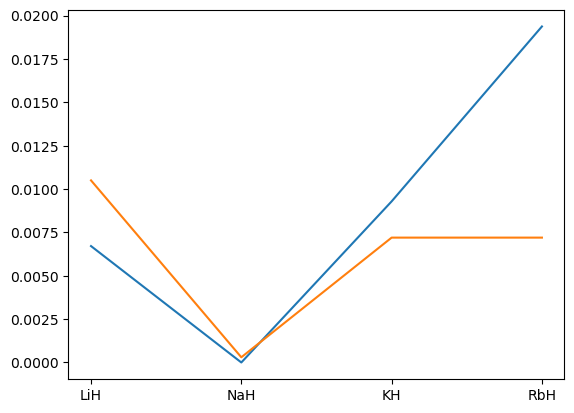

In [58]:
# dividing by base values 
x = ['LiH','NaH','KH','RbH']

y = np.array([val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH, val_RbH/base_RbH])-0.12158257017119953

fac = 0.03

y_redox = (np.array([3.05,2.71,2.94,2.94])-2.7)*fac
plt.plot(x,-y, y_redox)
plt.show()

#### Significance of Standard Reduction Potential
Higher Magnitude means its more likely to release an electron so the Hydrogen willl have a higher negetive charge. This is not refected in the electronegetivity difference. 
